<div style="text-align: right"> Update date: Nov 28, 2023 </div><br>

#  **Detection of inefficiencies in solar plant**<br>

The data is made up of 2 files for each photovoltaic solar energy generation plant:

* Plant 1, generation data
* Plant 1, environmental sensor data
* Plant 2, generation data
* Plant 2, environmental sensor data

To better provide, the details of the data structure can be consulted in the [data dictionary](data/datadictionary.pdf).<br><br>


# Exploratory Data Analysis<br>
## Objetive
<br>
Prepare the data generated by two solar plants, with the purpose of identifying the cause of the anomalous behavior in the generation of solar photovoltaic energy.<br><br>

## The general outline of this notebook is as follows:

    1. Explore data source
    2. Perform data quality
    3. Generate analytical data mart
<br>

## Main work tools

|Package|                           Version|
|:---------------------------------|--------:|
|matplotlib                        | 3.8.0|
|numpy                             | 1.25.2|
|notebook                          |6.5.4|
|pandas                            | 2.1.1|
|python                            |3.10.12|
|seaborn                           | 0.13.0|

## Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config IPCompleter.greedy = True
#Establecer formato para valores flotantes
pd.options.display.float_format = '{:15.2f}'.format

print('Imported libraries')

Imported libraries


## Explore data source

### First look  generation data Plant 1

In [2]:
p1g = pd.read_csv('data/Plant_1_Generation_Data.csv')
p1g.head()

DATE_TIME  PLANT_ID       SOURCE_KEY        DC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7            0.00   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y            0.00   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD            0.00   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4            0.00   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca            0.00   

         AC_POWER     DAILY_YIELD     TOTAL_YIELD  
0            0.00            0.00      6259559.00  
1            0.00            0.00      6183645.00  
2            0.00            0.00      6987759.00  
3            0.00            0.00      7602960.00  
4            0.00            0.00      7158964.00

In [3]:
p1g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


### First look environmental sensor data Plant 1

In [4]:
p1w = pd.read_csv('data/Plant_1_Weather_Sensor_Data.csv')
p1w.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe                25.18   
1  2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe                25.08   
2  2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe                24.94   
3  2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe                24.85   
4  2020-05-15 01:00:00   4135001  HmiyD2TTLFNqkNe                24.62   

   MODULE_TEMPERATURE     IRRADIATION  
0               22.86            0.00  
1               22.76            0.00  
2               22.59            0.00  
3               22.36            0.00  
4               22.17            0.00

In [5]:
p1w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3182 non-null   object 
 1   PLANT_ID             3182 non-null   int64  
 2   SOURCE_KEY           3182 non-null   object 
 3   AMBIENT_TEMPERATURE  3182 non-null   float64
 4   MODULE_TEMPERATURE   3182 non-null   float64
 5   IRRADIATION          3182 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 149.3+ KB


### First look  generation data Plant 2

In [6]:
p2g = pd.read_csv('data/Plant_2_Generation_Data.csv')
p2g.head()

DATE_TIME  PLANT_ID       SOURCE_KEY        DC_POWER  \
0  2020-05-15 00:00:00   4136001  4UPUqMRk7TRMgml            0.00   
1  2020-05-15 00:00:00   4136001  81aHJ1q11NBPMrL            0.00   
2  2020-05-15 00:00:00   4136001  9kRcWv60rDACzjR            0.00   
3  2020-05-15 00:00:00   4136001  Et9kgGMDl729KT4            0.00   
4  2020-05-15 00:00:00   4136001  IQ2d7wF4YD8zU1Q            0.00   

         AC_POWER     DAILY_YIELD     TOTAL_YIELD  
0            0.00         9425.00      2429011.00  
1            0.00            0.00   1215278736.00  
2            0.00         3075.33   2247719577.00  
3            0.00          269.93      1704250.00  
4            0.00         3177.00     19941526.00

In [7]:
p2g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


### First look environmental sensor data Plant 2

In [8]:
p2w = pd.read_csv('data/Plant_2_Weather_Sensor_Data.csv')
p2w.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4136001  iq8k7ZNt4Mwm3w0                27.00   
1  2020-05-15 00:15:00   4136001  iq8k7ZNt4Mwm3w0                26.88   
2  2020-05-15 00:30:00   4136001  iq8k7ZNt4Mwm3w0                26.68   
3  2020-05-15 00:45:00   4136001  iq8k7ZNt4Mwm3w0                26.50   
4  2020-05-15 01:00:00   4136001  iq8k7ZNt4Mwm3w0                26.60   

   MODULE_TEMPERATURE     IRRADIATION  
0               25.06            0.00  
1               24.42            0.00  
2               24.43            0.00  
3               24.42            0.00  
4               25.09            0.00

In [9]:
p2w.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB


## Perform data quality

### Plant quality 1 - generation data

Check for null values

In [10]:
p1g.isnull().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

Convertir DATE_TIME from object to datetime

In [11]:
p1g.dtypes

DATE_TIME       object
PLANT_ID         int64
SOURCE_KEY      object
DC_POWER       float64
AC_POWER       float64
DAILY_YIELD    float64
TOTAL_YIELD    float64
dtype: object

In [12]:
p1g.DATE_TIME[0:5]

0    15-05-2020 00:00
1    15-05-2020 00:00
2    15-05-2020 00:00
3    15-05-2020 00:00
4    15-05-2020 00:00
Name: DATE_TIME, dtype: object

In [13]:
p1g['DATE_TIME'] = pd.to_datetime(p1g.DATE_TIME, dayfirst=True)
p1g.head()

DATE_TIME  PLANT_ID       SOURCE_KEY        DC_POWER        AC_POWER  \
0 2020-05-15   4135001  1BY6WEcLGh8j5v7            0.00            0.00   
1 2020-05-15   4135001  1IF53ai7Xc0U56Y            0.00            0.00   
2 2020-05-15   4135001  3PZuoBAID5Wc2HD            0.00            0.00   
3 2020-05-15   4135001  7JYdWkrLSPkdwr4            0.00            0.00   
4 2020-05-15   4135001  McdE0feGgRqW7Ca            0.00            0.00   

      DAILY_YIELD     TOTAL_YIELD  
0            0.00      6259559.00  
1            0.00      6183645.00  
2            0.00      6987759.00  
3            0.00      7602960.00  
4            0.00      7158964.00

Check that the plant identifier is unique.

In [14]:
p1g.PLANT_ID.unique()

array([4135001])

Replace the PLANT_ID value with a descriptive data

In [15]:
p1g['PLANT_ID'] = p1g.PLANT_ID.replace(4135001, 'p1')

Check duplicate records

In [16]:
p1g.duplicated().sum()

0

#### Analysis of numerical variables

Generate statistics

In [17]:
p1g.describe().T

count                           mean  \
DATE_TIME             68778  2020-06-01 08:02:49.458256896   
DC_POWER           68778.00                        3147.43   
AC_POWER           68778.00                         307.80   
DAILY_YIELD        68778.00                        3295.97   
TOTAL_YIELD        68778.00                     6978711.76   

                             min                  25%                  50%  \
DATE_TIME    2020-05-15 00:00:00  2020-05-24 00:45:00  2020-06-01 14:30:00   
DC_POWER                    0.00                 0.00               429.00   
AC_POWER                    0.00                 0.00                41.49   
DAILY_YIELD                 0.00                 0.00              2658.71   
TOTAL_YIELD           6183645.00           6512002.54           7146685.00   

                             75%                  max             std  
DATE_TIME    2020-06-09 20:00:00  2020-06-17 23:45:00             NaN  
DC_POWER                 6366.96             14471.12         4036.46  
AC_POWER                  623.62              1410.95          394.40  
DAILY_YIELD              6274.00              9163.00         3145.18  
TOTAL_YIELD           7268705.91           7846821.00       416271.98

The difference in the averages between DC_POWER and AC_POWER is notable

Analyze using a graph

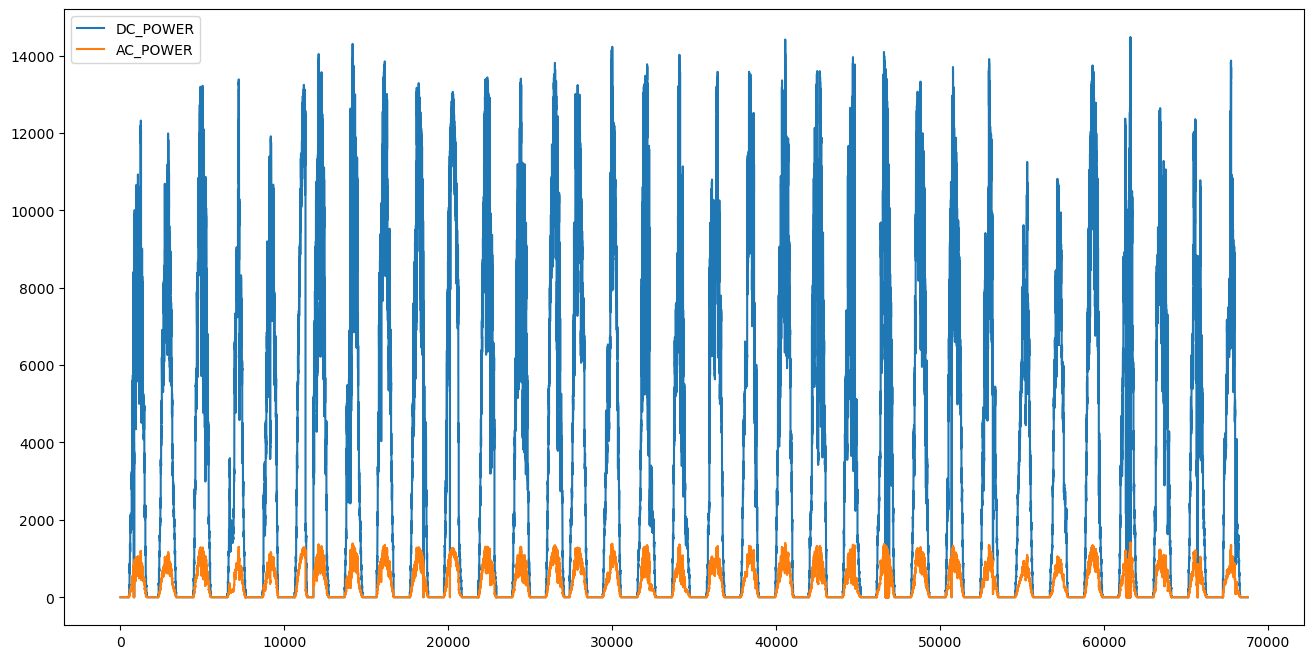

In [18]:
p1g[['DC_POWER', 'AC_POWER']].plot.line(figsize=(16,8))
plt.show()

It can be seen that there is a great difference between the energy generated (DC) and the energy transformed (AC).

So, check if the energy generation is directly proportional to the quantity transformed through a correlation, and then check the average ratio between both measurements.

In [19]:
p1g['DC_POWER'].corr(p1g['AC_POWER'])

0.9999962553331404

In [20]:
(p1g.DC_POWER / p1g.AC_POWER).describe()

count          36827.00
mean              10.23
std                0.05
min                9.38
25%               10.20
50%               10.22
75%               10.25
max               10.47
dtype: float64

Apparently the inverters on plant 1 carry out the energy transformation from DC to AC at 10%, which, a priori, is very low. Therefore, it would be worth exploring this in greater detail and comparing it with the energy transformation carried out in plant 2.

Analyze the variable DAILY_YIELD, since the [metadata](data/datadictionary.pdf) indicates that the variable TOTAL_YIELD is the accumulated total **per inverter**, but in DAILY_YIELD it does not specify it, therefore, we are going to see through a sample if there are differences between the data of the investors at the same time.

Select sample of inverters.

In [21]:
select_inverters = list(p1g.SOURCE_KEY.unique()[:5])
temp = p1g[p1g.SOURCE_KEY.isin(select_inverters)].set_index('DATE_TIME')
temp

PLANT_ID       SOURCE_KEY        DC_POWER        AC_POWER  \
DATE_TIME                                                                       
2020-05-15 00:00:00       p1  1BY6WEcLGh8j5v7            0.00            0.00   
2020-05-15 00:00:00       p1  1IF53ai7Xc0U56Y            0.00            0.00   
2020-05-15 00:00:00       p1  3PZuoBAID5Wc2HD            0.00            0.00   
2020-05-15 00:00:00       p1  7JYdWkrLSPkdwr4            0.00            0.00   
2020-05-15 00:00:00       p1  McdE0feGgRqW7Ca            0.00            0.00   
...                      ...              ...             ...             ...   
2020-06-17 23:45:00       p1  1BY6WEcLGh8j5v7            0.00            0.00   
2020-06-17 23:45:00       p1  1IF53ai7Xc0U56Y            0.00            0.00   
2020-06-17 23:45:00       p1  3PZuoBAID5Wc2HD            0.00            0.00   
2020-06-17 23:45:00       p1  7JYdWkrLSPkdwr4            0.00            0.00   
2020-06-17 23:45:00       p1  McdE0feGgRqW7Ca            0.00            0.00   

                        DAILY_YIELD     TOTAL_YIELD  
DATE_TIME                                            
2020-05-15 00:00:00            0.00      6259559.00  
2020-05-15 00:00:00            0.00      6183645.00  
2020-05-15 00:00:00            0.00      6987759.00  
2020-05-15 00:00:00            0.00      7602960.00  
2020-05-15 00:00:00            0.00      7158964.00  
...                             ...             ...  
2020-06-17 23:45:00         5521.00      6485319.00  
2020-06-17 23:45:00         6034.00      6433566.00  
2020-06-17 23:45:00         6052.00      7237425.00  
2020-06-17 23:45:00         5856.00      7846821.00  
2020-06-17 23:45:00         5992.00      7408587.00  

[15648 rows x 6 columns]

The data shows that there are differences in the DAILY_YIELD variable for the same date, so rule out that it is not an effect of those specific records.

Analyze graphically, simplify with a sample of days.

In [22]:
temp = temp.loc['2020-06-01':'2020-06-05']
temp

PLANT_ID       SOURCE_KEY        DC_POWER        AC_POWER  \
DATE_TIME                                                                       
2020-06-01 00:00:00       p1  1BY6WEcLGh8j5v7            0.00            0.00   
2020-06-01 00:00:00       p1  1IF53ai7Xc0U56Y            0.00            0.00   
2020-06-01 00:00:00       p1  3PZuoBAID5Wc2HD            0.00            0.00   
2020-06-01 00:00:00       p1  7JYdWkrLSPkdwr4            0.00            0.00   
2020-06-01 00:00:00       p1  McdE0feGgRqW7Ca            0.00            0.00   
...                      ...              ...             ...             ...   
2020-06-05 23:45:00       p1  1BY6WEcLGh8j5v7            0.00            0.00   
2020-06-05 23:45:00       p1  1IF53ai7Xc0U56Y            0.00            0.00   
2020-06-05 23:45:00       p1  3PZuoBAID5Wc2HD            0.00            0.00   
2020-06-05 23:45:00       p1  7JYdWkrLSPkdwr4            0.00            0.00   
2020-06-05 23:45:00       p1  McdE0feGgRqW7Ca            0.00            0.00   

                        DAILY_YIELD     TOTAL_YIELD  
DATE_TIME                                            
2020-06-01 00:00:00          829.00      6377931.00  
2020-06-01 00:00:00            0.00      6311432.00  
2020-06-01 00:00:00            0.00      7115304.00  
2020-06-01 00:00:00          730.38      7727821.00  
2020-06-01 00:00:00            0.00      7286760.00  
...                             ...             ...  
2020-06-05 23:45:00         7162.00      6412542.00  
2020-06-05 23:45:00            0.00      6348557.00  
2020-06-05 23:45:00            0.00      7152486.00  
2020-06-05 23:45:00            0.00      7764140.00  
2020-06-05 23:45:00         4950.00      7324681.00  

[2370 rows x 6 columns]

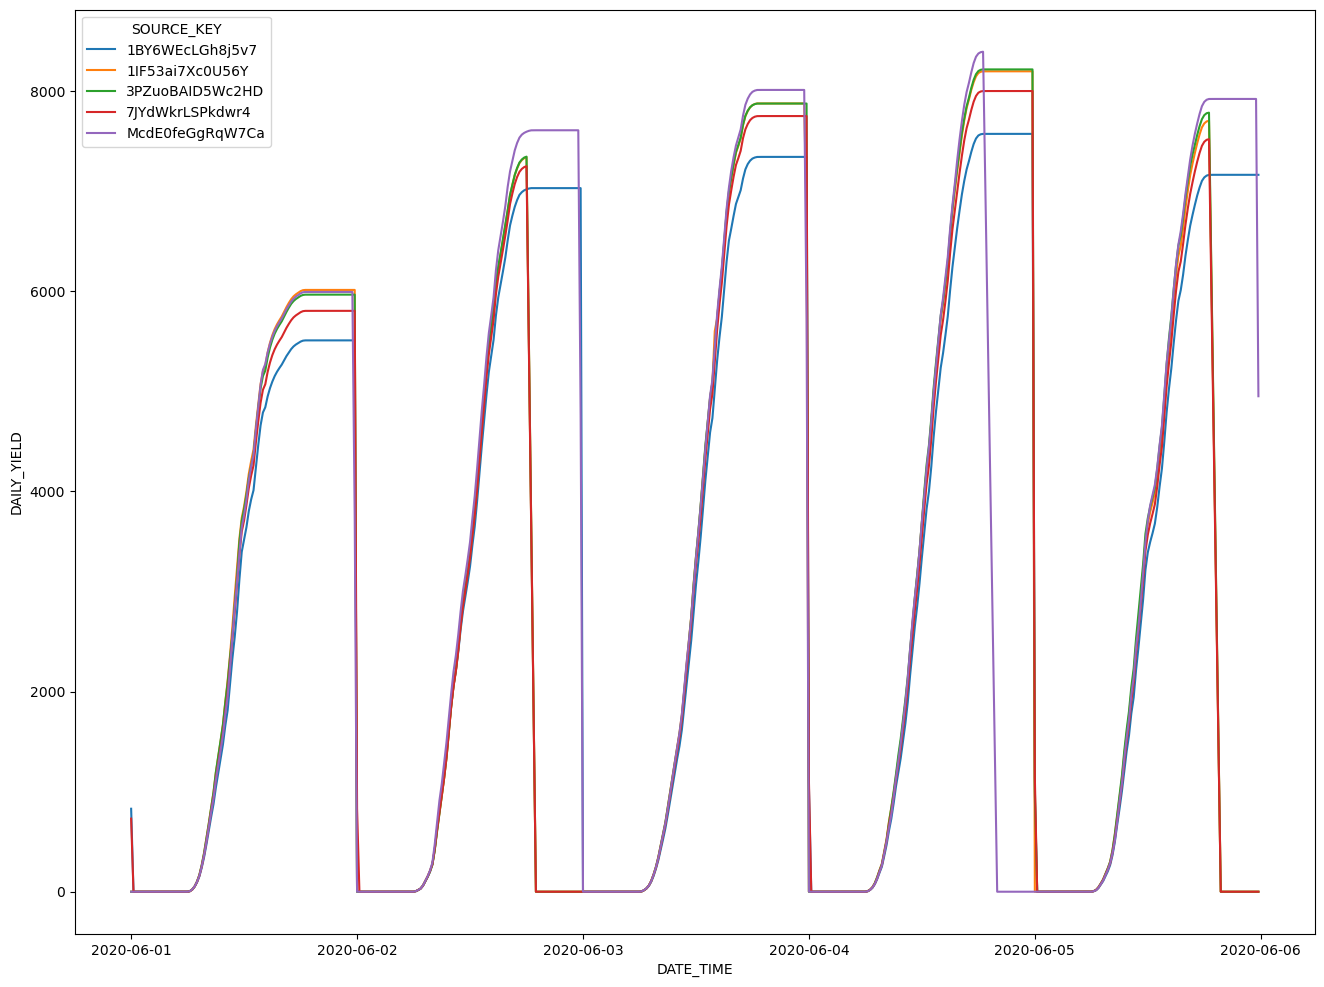

In [23]:
plt.figure(figsize = (16,12))
sns.lineplot(data = temp.reset_index(), x = temp.reset_index().DATE_TIME,
             y = 'DAILY_YIELD', hue = 'SOURCE_KEY');

In the graph it can be seen that the inverters have different data at the same time, so it is concluded that the variable DAILY_YIELD is **per inverter**.

Finally, we are going to analyze the period in which we have data, and if the number of daily measurements is constant.

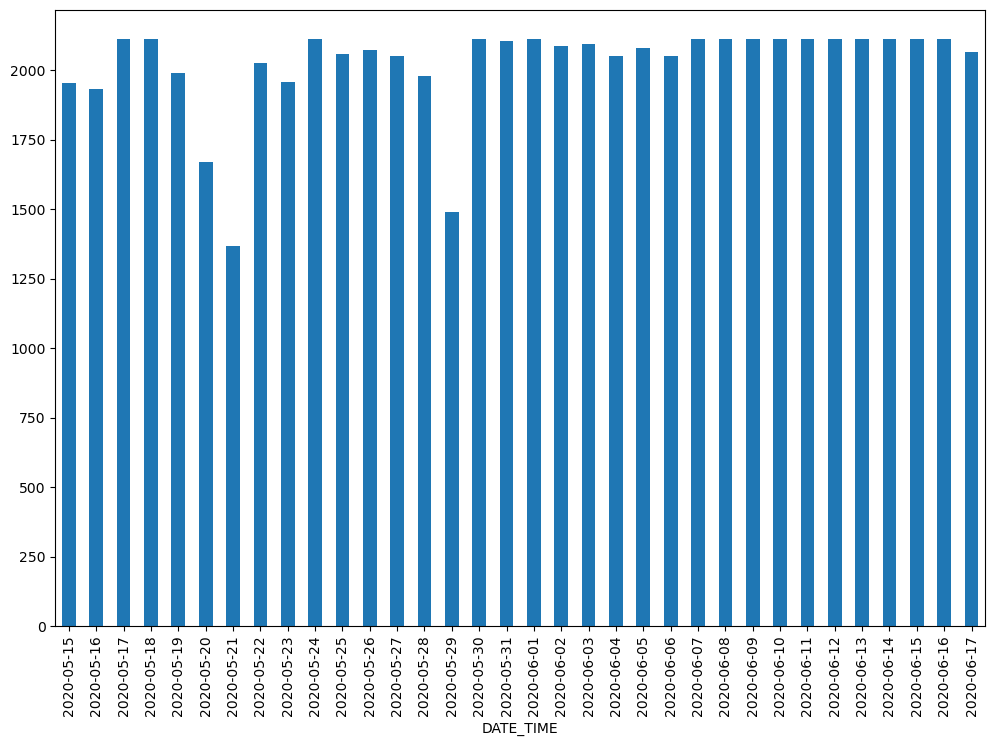

In [24]:
p1g.DATE_TIME.dt.date.value_counts().sort_index().plot.bar(figsize = (12,8))
plt.show()

Conclusions:

  * The data period is between May 15, 2020 and June 17, 2020
  * We have data for all days of the period
  * But some days like 05/21 or 05/29 have fewer measurements
  * So it doesn't seem 100% regular

#### Analysis of categorical variables

Analyze the categorical variable SOURCE_KEY, which corresponds to the identifier of the inverters.

In [25]:
p1g.SOURCE_KEY.nunique()

22

In [26]:
p1g.SOURCE_KEY.value_counts()

SOURCE_KEY
bvBOhCH3iADSZry    3155
1BY6WEcLGh8j5v7    3154
7JYdWkrLSPkdwr4    3133
VHMLBKoKgIrUVDU    3133
ZnxXDlPa8U1GXgE    3130
ih0vzX44oOqAx2f    3130
z9Y9gH1T5YWrNuG    3126
wCURE6d3bPkepu2    3126
uHbuxQJl8lW7ozc    3125
pkci93gMrogZuBj    3125
iCRJl6heRkivqQ3    3125
rGa61gmuvPhdLxV    3124
sjndEbLyjtCKgGv    3124
McdE0feGgRqW7Ca    3124
zVJPv84UY57bAof    3124
ZoEaEvLYb1n2sOq    3123
1IF53ai7Xc0U56Y    3119
adLQvlD726eNBSB    3119
zBIq5rxdHJRwDNY    3119
WRmjgnKYAwPKWDb    3118
3PZuoBAID5Wc2HD    3118
YxYtjZvoooNbGkE    3104
Name: count, dtype: int64

Conclusions:

* Plant 1 has 22 inverters
* They all have a similar number of measurements although not exactly the same 


### Planta quality 1 - environmental sensor data

Check null values

In [27]:
p1w.isnull().sum()

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

Change the data type of the DATE_TIME variable

In [28]:
p1w.dtypes

DATE_TIME               object
PLANT_ID                 int64
SOURCE_KEY              object
AMBIENT_TEMPERATURE    float64
MODULE_TEMPERATURE     float64
IRRADIATION            float64
dtype: object

In [29]:
p1w.DATE_TIME[0:5]

0    2020-05-15 00:00:00
1    2020-05-15 00:15:00
2    2020-05-15 00:30:00
3    2020-05-15 00:45:00
4    2020-05-15 01:00:00
Name: DATE_TIME, dtype: object

In [30]:
p1w['DATE_TIME'] = pd.to_datetime(p1w.DATE_TIME)
p1w.dtypes

DATE_TIME              datetime64[ns]
PLANT_ID                        int64
SOURCE_KEY                     object
AMBIENT_TEMPERATURE           float64
MODULE_TEMPERATURE            float64
IRRADIATION                   float64
dtype: object

Replace the values of the PLANT_ID variable with a descriptive one.

In [31]:
p1w.PLANT_ID.unique()

array([4135001])

In [32]:
p1w['PLANT_ID'] =  p1w.PLANT_ID.replace(to_replace=4135001, value='p1')
p1w.head()

DATE_TIME PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0 2020-05-15 00:00:00       p1  HmiyD2TTLFNqkNe                25.18   
1 2020-05-15 00:15:00       p1  HmiyD2TTLFNqkNe                25.08   
2 2020-05-15 00:30:00       p1  HmiyD2TTLFNqkNe                24.94   
3 2020-05-15 00:45:00       p1  HmiyD2TTLFNqkNe                24.85   
4 2020-05-15 01:00:00       p1  HmiyD2TTLFNqkNe                24.62   

   MODULE_TEMPERATURE     IRRADIATION  
0               22.86            0.00  
1               22.76            0.00  
2               22.59            0.00  
3               22.36            0.00  
4               22.17            0.00

Check duplicate values

In [33]:
p1w.duplicated().sum()

0

#### Analysis of numerical variables

Generate statistics

In [34]:
p1w.describe().T

count                           mean  \
DATE_TIME                      3182  2020-06-01 05:52:22.080452608   
AMBIENT_TEMPERATURE         3182.00                          25.53   
MODULE_TEMPERATURE          3182.00                          31.09   
IRRADIATION                 3182.00                           0.23   

                                     min                  25%  \
DATE_TIME            2020-05-15 00:00:00  2020-05-23 22:48:45   
AMBIENT_TEMPERATURE                20.40                22.71   
MODULE_TEMPERATURE                 18.14                21.09   
IRRADIATION                         0.00                 0.00   

                                     50%                  75%  \
DATE_TIME            2020-06-01 09:52:30  2020-06-09 16:56:15   
AMBIENT_TEMPERATURE                24.61                27.92   
MODULE_TEMPERATURE                 24.62                41.31   
IRRADIATION                         0.02                 0.45   

                                     max             std  
DATE_TIME            2020-06-17 23:45:00             NaN  
AMBIENT_TEMPERATURE                35.25            3.35  
MODULE_TEMPERATURE                 65.55           12.26  
IRRADIATION                         1.22            0.30

Review the frequencies in the DATE_TIME variable for each of the days.

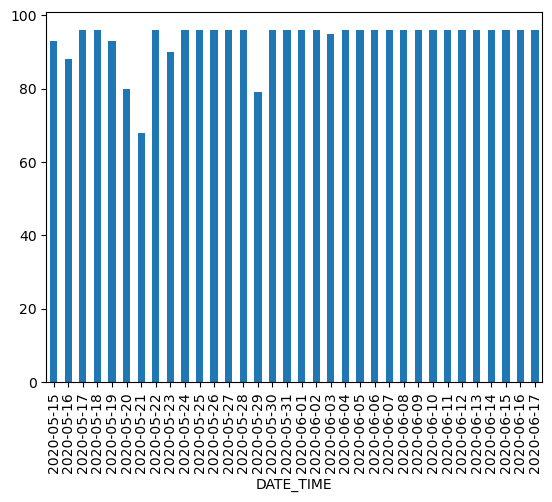

In [35]:
p1w.DATE_TIME.dt.date.value_counts().sort_index().plot.bar()
plt.show()

Conclusions:
* The data period is between May 15, 2020 and June 17, 2020
* We have data for every days, no intermediate ones are missing 
* But some days like 05/21 or 05/29 have fewer measurements
* So it doesn't seem 100% regular


#### Analysis of categorical variables

Analyze the SOURCE_KEY variable

In [36]:
p1w.SOURCE_KEY.value_counts()

SOURCE_KEY
HmiyD2TTLFNqkNe    3182
Name: count, dtype: int64

On plant 1 there is a sensor for environmental variables.

### Plant quality 2 - generation data

Check null values

In [37]:
p2g.isnull().sum()

DATE_TIME      0
PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64

Convertir DATE_TIME from object to datetime

In [38]:
p2g.dtypes

DATE_TIME       object
PLANT_ID         int64
SOURCE_KEY      object
DC_POWER       float64
AC_POWER       float64
DAILY_YIELD    float64
TOTAL_YIELD    float64
dtype: object

In [39]:
p2g.DATE_TIME[1:5]

1    2020-05-15 00:00:00
2    2020-05-15 00:00:00
3    2020-05-15 00:00:00
4    2020-05-15 00:00:00
Name: DATE_TIME, dtype: object

In [40]:
p2g['DATE_TIME'] =  pd.to_datetime(p2g.DATE_TIME)

Replace the PLANT_ID value with a descriptive value

In [41]:
p2g.PLANT_ID.unique()

array([4136001])

In [42]:
p2g['PLANT_ID'] = p2g.PLANT_ID.replace(4136001, 'p2')

Check duplicate records

In [43]:
p2g.duplicated().sum()

0

#### Analysis of numerical variables

Generate statistics

In [44]:
p2g.describe().T

count                           mean  \
DATE_TIME             67698  2020-06-01 10:44:33.650625024   
DC_POWER           67698.00                         246.70   
AC_POWER           67698.00                         241.28   
DAILY_YIELD        67698.00                        3294.89   
TOTAL_YIELD        67698.00                   658944788.42   

                             min                  25%                  50%  \
DATE_TIME    2020-05-15 00:00:00  2020-05-23 21:00:00  2020-06-01 23:00:00   
DC_POWER                    0.00                 0.00                 0.00   
AC_POWER                    0.00                 0.00                 0.00   
DAILY_YIELD                 0.00               272.75              2911.00   
TOTAL_YIELD                 0.00          19964944.87         282627587.00   

                             75%                  max             std  
DATE_TIME    2020-06-09 23:30:00  2020-06-17 23:45:00             NaN  
DC_POWER                  446.59              1420.93          370.57  
AC_POWER                  438.22              1385.42          362.11  
DAILY_YIELD              5534.00              9873.00         2919.45  
TOTAL_YIELD        1348495113.00        2247916295.00    729667771.07

The values of the DC_POWER and AC_POWER variables are much closer to each other.

Calculate the ratio between both measurements.

In [45]:
(p2g.DC_POWER / p2g.AC_POWER).describe()

count          32036.00
mean               1.02
std                0.01
min                0.99
25%                1.02
50%                1.02
75%                1.03
max                1.10
dtype: float64

Apparently the inverters on floor 2 carry out the energy transformation from DC to AC very close to 100%.

Analyze whether the values of the DAILY_YIELD variable correspond to those accumulated by plant or inverter.

Select sample of inverters

In [46]:
select_inverters = list(p2g.SOURCE_KEY.unique()[:5])
temp = p2g[p2g.SOURCE_KEY.isin(select_inverters)].set_index('DATE_TIME')
temp

PLANT_ID       SOURCE_KEY        DC_POWER        AC_POWER  \
DATE_TIME                                                                       
2020-05-15 00:00:00       p2  4UPUqMRk7TRMgml            0.00            0.00   
2020-05-15 00:00:00       p2  81aHJ1q11NBPMrL            0.00            0.00   
2020-05-15 00:00:00       p2  9kRcWv60rDACzjR            0.00            0.00   
2020-05-15 00:00:00       p2  Et9kgGMDl729KT4            0.00            0.00   
2020-05-15 00:00:00       p2  IQ2d7wF4YD8zU1Q            0.00            0.00   
...                      ...              ...             ...             ...   
2020-06-17 23:45:00       p2  4UPUqMRk7TRMgml            0.00            0.00   
2020-06-17 23:45:00       p2  81aHJ1q11NBPMrL            0.00            0.00   
2020-06-17 23:45:00       p2  9kRcWv60rDACzjR            0.00            0.00   
2020-06-17 23:45:00       p2  Et9kgGMDl729KT4            0.00            0.00   
2020-06-17 23:45:00       p2  IQ2d7wF4YD8zU1Q            0.00            0.00   

                        DAILY_YIELD     TOTAL_YIELD  
DATE_TIME                                            
2020-05-15 00:00:00         9425.00      2429011.00  
2020-05-15 00:00:00            0.00   1215278736.00  
2020-05-15 00:00:00         3075.33   2247719577.00  
2020-05-15 00:00:00          269.93      1704250.00  
2020-05-15 00:00:00         3177.00     19941526.00  
...                             ...             ...  
2020-06-17 23:45:00         4446.00      2653495.00  
2020-06-17 23:45:00         4306.00   1215485799.00  
2020-06-17 23:45:00         4197.00   2247916295.00  
2020-06-17 23:45:00         4020.00      1854162.00  
2020-06-17 23:45:00         4251.00     20185065.00  

[15263 rows x 6 columns]

In the data from plant 2 it is observed that there are differences in the DAILY_YIELD variable for the same date, so rule out that it is not an effect of those specific records.

Analyze graphically(simplify with a sample of days).

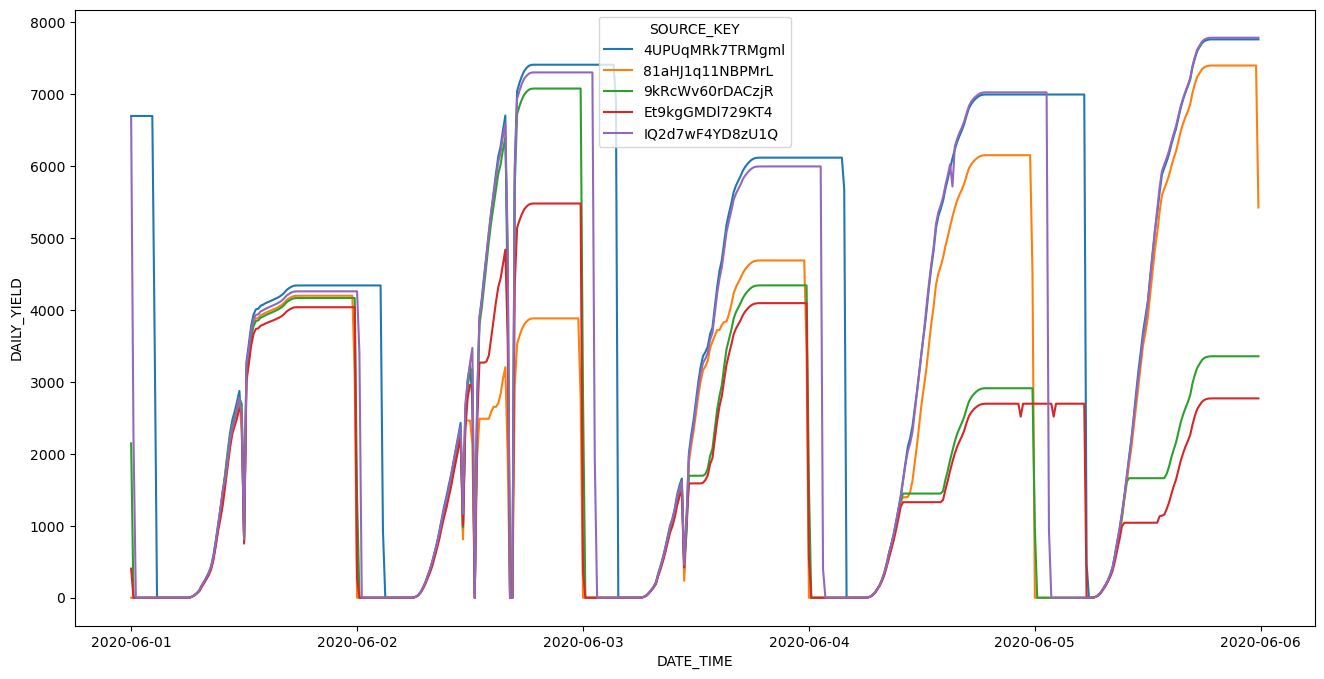

In [47]:
temp = temp.loc['2020-06-01':'2020-06-05']
plt.figure(figsize = (16,8))
sns.lineplot(data = temp.reset_index(), x = temp.reset_index().DATE_TIME,
             y = 'DAILY_YIELD', hue = 'SOURCE_KEY');

In the graph it can be seen that the inverters of plant 2 have different data at the same time, so it is concluded that the variable DAILY_YIELD is per inverter.<br><br>

Analyze the DATE_TIME variable

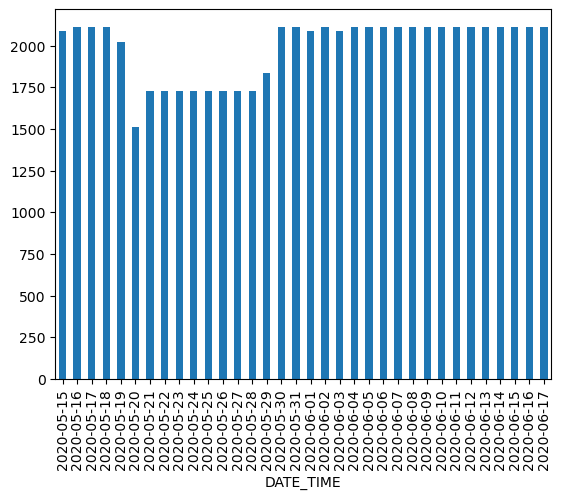

In [48]:
p2g.DATE_TIME.dt.date.value_counts().sort_index().plot.bar()
plt.show()

Conclusions:

* The data period is between May 15, 2020 and June 17, 2020
* We have data for every day, no intermediate ones are missing
* But some days like 05/20 and several more, have fewer measurements
* So it doesn't seem 100% regular

#### Analysis of categorical variables

Analyze the SOURCE_KEY variable, corresponding to the identifier of the inverters.

In [49]:
p2g.SOURCE_KEY.nunique()

22

In [50]:
p2g.SOURCE_KEY.value_counts()

SOURCE_KEY
xoJJ8DcxJEcupym    3259
WcxssY2VbP4hApt    3259
9kRcWv60rDACzjR    3259
vOuJvMaM2sgwLmb    3259
rrq4fwE8jgrTyWY    3259
LYwnQax7tkwH5Cb    3259
LlT2YUhhzqhg5Sw    3259
q49J1IKaHRwDQnt    3259
oZZkBaNadn6DNKz    3259
PeE6FRyGXUgsRhN    3259
81aHJ1q11NBPMrL    3259
V94E5Ben1TlhnDV    3259
oZ35aAeoifZaQzV    3195
4UPUqMRk7TRMgml    3195
Qf4GUc1pJu5T6c6    3195
Mx2yZCDsyf6DPfv    3195
Et9kgGMDl729KT4    3195
Quc1TzYxW2pYoWX    3195
mqwcsP2rE7J0TFp    2355
NgDl19wMapZy17u    2355
IQ2d7wF4YD8zU1Q    2355
xMbIugepa2P7lBB    2355
Name: count, dtype: int64

Conclusions:

* Plant 2 has 22 inverters
* They all have a similar number of measurements, although not exactly the same.
* Except for 4 that have about 800 fewer measurements.


### Plant quality 2 - environmental sensor data

Check null values

In [51]:
p2w.isnull().sum()

DATE_TIME              0
PLANT_ID               0
SOURCE_KEY             0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
dtype: int64

Change the data type of the DATE_TIME variable

In [52]:
p2w.dtypes

DATE_TIME               object
PLANT_ID                 int64
SOURCE_KEY              object
AMBIENT_TEMPERATURE    float64
MODULE_TEMPERATURE     float64
IRRADIATION            float64
dtype: object

In [53]:
p2w.DATE_TIME[0:5]

0    2020-05-15 00:00:00
1    2020-05-15 00:15:00
2    2020-05-15 00:30:00
3    2020-05-15 00:45:00
4    2020-05-15 01:00:00
Name: DATE_TIME, dtype: object

In [54]:
p2w['DATE_TIME'] = pd.to_datetime(p2w.DATE_TIME)
p2w.dtypes

DATE_TIME              datetime64[ns]
PLANT_ID                        int64
SOURCE_KEY                     object
AMBIENT_TEMPERATURE           float64
MODULE_TEMPERATURE            float64
IRRADIATION                   float64
dtype: object

Replace the PLANT_ID value with a descriptive data

In [55]:
p2w.PLANT_ID.unique()

array([4136001])

In [56]:
p2w['PLANT_ID'] = p2w.PLANT_ID.replace(to_replace=4136001, value='p2')
p2w.head()

DATE_TIME PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0 2020-05-15 00:00:00       p2  iq8k7ZNt4Mwm3w0                27.00   
1 2020-05-15 00:15:00       p2  iq8k7ZNt4Mwm3w0                26.88   
2 2020-05-15 00:30:00       p2  iq8k7ZNt4Mwm3w0                26.68   
3 2020-05-15 00:45:00       p2  iq8k7ZNt4Mwm3w0                26.50   
4 2020-05-15 01:00:00       p2  iq8k7ZNt4Mwm3w0                26.60   

   MODULE_TEMPERATURE     IRRADIATION  
0               25.06            0.00  
1               24.42            0.00  
2               24.43            0.00  
3               24.42            0.00  
4               25.09            0.00

Check duplicate values

In [57]:
p2w.duplicated().sum()

0

#### Analysis of numerical variables

Generate statistics

In [58]:
p2w.describe().T

count                           mean  \
DATE_TIME                      3259  2020-06-01 00:04:35.053697536   
AMBIENT_TEMPERATURE         3259.00                          28.07   
MODULE_TEMPERATURE          3259.00                          32.77   
IRRADIATION                 3259.00                           0.23   

                                     min                  25%  \
DATE_TIME            2020-05-15 00:00:00  2020-05-23 12:07:30   
AMBIENT_TEMPERATURE                20.94                24.60   
MODULE_TEMPERATURE                 20.27                23.72   
IRRADIATION                         0.00                 0.00   

                                     50%                  75%  \
DATE_TIME            2020-06-01 00:00:00  2020-06-09 12:07:30   
AMBIENT_TEMPERATURE                26.98                31.06   
MODULE_TEMPERATURE                 27.53                40.48   
IRRADIATION                         0.02                 0.44   

                                     max             std  
DATE_TIME            2020-06-17 23:45:00             NaN  
AMBIENT_TEMPERATURE                39.18            4.06  
MODULE_TEMPERATURE                 66.64           11.34  
IRRADIATION                         1.10            0.31

Check the frequencies in the DATE_TIME variable

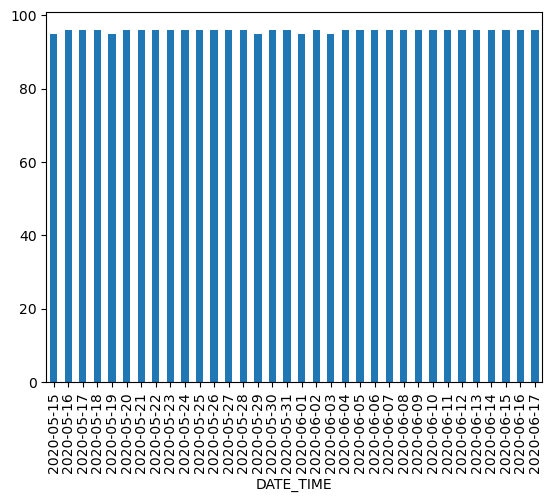

In [59]:
p2w.DATE_TIME.dt.date.value_counts().sort_index().plot.bar()
plt.show()

Conclusions:

* The data period is between May 15, 2020 and June 17, 2020
* We have data for every day, no intermediate ones are missing
* But some days like 05/15 or others have fewer measurements, although they are much less missing than in the other datasets.
* But it doesn't seem 100% regular

#### Analysis of categorical  variables

Analyze the SOURCE_KEY variable corresponding to the sensor identifier

In [60]:
p2w.SOURCE_KEY.value_counts()

SOURCE_KEY
iq8k7ZNt4Mwm3w0    3259
Name: count, dtype: int64

On floor 2 there is a sensor for environmental variables.

### Pending points to analyze later

* On plat 1 it seems that the inverters are transforming only 10% of DC to AC, which a priori is very low.
* On plant 2 the transformation ratio is close to 100%.
* Measurement intervals are not 100% regular. There are days with fewer measurements, and there are also differences by inverter.

## Generate analytical data mart

### Join generation data dataset

Review dimension of each dataset

In [61]:
p1g.shape, p2g.shape, p1g.shape[0] + p2g.shape[0]

((68778, 7), (67698, 7), 136476)

In [62]:
generation = pd.concat([p1g, p2g], axis=0)
generation

DATE_TIME PLANT_ID       SOURCE_KEY        DC_POWER  \
0     2020-05-15 00:00:00       p1  1BY6WEcLGh8j5v7            0.00   
1     2020-05-15 00:00:00       p1  1IF53ai7Xc0U56Y            0.00   
2     2020-05-15 00:00:00       p1  3PZuoBAID5Wc2HD            0.00   
3     2020-05-15 00:00:00       p1  7JYdWkrLSPkdwr4            0.00   
4     2020-05-15 00:00:00       p1  McdE0feGgRqW7Ca            0.00   
...                   ...      ...              ...             ...   
67693 2020-06-17 23:45:00       p2  q49J1IKaHRwDQnt            0.00   
67694 2020-06-17 23:45:00       p2  rrq4fwE8jgrTyWY            0.00   
67695 2020-06-17 23:45:00       p2  vOuJvMaM2sgwLmb            0.00   
67696 2020-06-17 23:45:00       p2  xMbIugepa2P7lBB            0.00   
67697 2020-06-17 23:45:00       p2  xoJJ8DcxJEcupym            0.00   

             AC_POWER     DAILY_YIELD     TOTAL_YIELD  
0                0.00            0.00      6259559.00  
1                0.00            0.00      6183645.00  
2                0.00            0.00      6987759.00  
3                0.00            0.00      7602960.00  
4                0.00            0.00      7158964.00  
...               ...             ...             ...  
67693            0.00         4157.00       520758.00  
67694            0.00         3931.00    121131356.00  
67695            0.00         4322.00      2427691.00  
67696            0.00         4218.00    106896394.00  
67697            0.00         4316.00    209335741.00  

[136476 rows x 7 columns]

Rename variables

In [63]:
generation.columns = [
    'date_time',
    'plant',
    'inverter_id',
    'kw_dc',
    'kw_ac',
    'kw_day',
    'kw_total',
]
generation.dtypes

date_time      datetime64[ns]
plant                  object
inverter_id            object
kw_dc                 float64
kw_ac                 float64
kw_day                float64
kw_total              float64
dtype: object

Now, since according to the documentation, the variables kw_day and kw_total are directly related to kw_dc and kw_ac, we are going to perform a consistency analysis.

In [64]:
generation2 = generation.copy()
generation2

date_time plant      inverter_id           kw_dc  \
0     2020-05-15 00:00:00    p1  1BY6WEcLGh8j5v7            0.00   
1     2020-05-15 00:00:00    p1  1IF53ai7Xc0U56Y            0.00   
2     2020-05-15 00:00:00    p1  3PZuoBAID5Wc2HD            0.00   
3     2020-05-15 00:00:00    p1  7JYdWkrLSPkdwr4            0.00   
4     2020-05-15 00:00:00    p1  McdE0feGgRqW7Ca            0.00   
...                   ...   ...              ...             ...   
67693 2020-06-17 23:45:00    p2  q49J1IKaHRwDQnt            0.00   
67694 2020-06-17 23:45:00    p2  rrq4fwE8jgrTyWY            0.00   
67695 2020-06-17 23:45:00    p2  vOuJvMaM2sgwLmb            0.00   
67696 2020-06-17 23:45:00    p2  xMbIugepa2P7lBB            0.00   
67697 2020-06-17 23:45:00    p2  xoJJ8DcxJEcupym            0.00   

                kw_ac          kw_day        kw_total  
0                0.00            0.00      6259559.00  
1                0.00            0.00      6183645.00  
2                0.00            0.00      6987759.00  
3                0.00            0.00      7602960.00  
4                0.00            0.00      7158964.00  
...               ...             ...             ...  
67693            0.00         4157.00       520758.00  
67694            0.00         3931.00    121131356.00  
67695            0.00         4322.00      2427691.00  
67696            0.00         4218.00    106896394.00  
67697            0.00         4316.00    209335741.00  

[136476 rows x 7 columns]

Generate the date variable to be able to add by it.

In [65]:
generation2['date'] = generation2.date_time.dt.date
generation2

date_time plant      inverter_id           kw_dc  \
0     2020-05-15 00:00:00    p1  1BY6WEcLGh8j5v7            0.00   
1     2020-05-15 00:00:00    p1  1IF53ai7Xc0U56Y            0.00   
2     2020-05-15 00:00:00    p1  3PZuoBAID5Wc2HD            0.00   
3     2020-05-15 00:00:00    p1  7JYdWkrLSPkdwr4            0.00   
4     2020-05-15 00:00:00    p1  McdE0feGgRqW7Ca            0.00   
...                   ...   ...              ...             ...   
67693 2020-06-17 23:45:00    p2  q49J1IKaHRwDQnt            0.00   
67694 2020-06-17 23:45:00    p2  rrq4fwE8jgrTyWY            0.00   
67695 2020-06-17 23:45:00    p2  vOuJvMaM2sgwLmb            0.00   
67696 2020-06-17 23:45:00    p2  xMbIugepa2P7lBB            0.00   
67697 2020-06-17 23:45:00    p2  xoJJ8DcxJEcupym            0.00   

                kw_ac          kw_day        kw_total        date  
0                0.00            0.00      6259559.00  2020-05-15  
1                0.00            0.00      6183645.00  2020-05-15  
2                0.00            0.00      6987759.00  2020-05-15  
3                0.00            0.00      7602960.00  2020-05-15  
4                0.00            0.00      7158964.00  2020-05-15  
...               ...             ...             ...         ...  
67693            0.00         4157.00       520758.00  2020-06-17  
67694            0.00         3931.00    121131356.00  2020-06-17  
67695            0.00         4322.00      2427691.00  2020-06-17  
67696            0.00         4218.00    106896394.00  2020-06-17  
67697            0.00         4316.00    209335741.00  2020-06-17  

[136476 rows x 8 columns]

The sum per plant, date and inverter of kw_dc or kw_ac should match the maximum of kw_day.

In [66]:
vars_aggregation = {
    'kw_dc':'sum',
    'kw_ac':'sum',
    'kw_day':'max',
    'kw_total':'max'}
generation2 = generation2.groupby(['plant', 'date', 'inverter_id'])\
    .agg(vars_aggregation).reset_index()
generation2

plant        date      inverter_id           kw_dc           kw_ac  \
0       p1  2020-05-15  1BY6WEcLGh8j5v7       235340.70        23046.55   
1       p1  2020-05-15  1IF53ai7Xc0U56Y       258911.11        25343.29   
2       p1  2020-05-15  3PZuoBAID5Wc2HD       254766.05        24937.70   
3       p1  2020-05-15  7JYdWkrLSPkdwr4       250608.34        24533.91   
4       p1  2020-05-15  McdE0feGgRqW7Ca       264030.98        25840.63   
...    ...         ...              ...             ...             ...   
1459    p2  2020-06-17  q49J1IKaHRwDQnt        17001.51        16655.15   
1460    p2  2020-06-17  rrq4fwE8jgrTyWY        16073.93        15748.92   
1461    p2  2020-06-17  vOuJvMaM2sgwLmb        17710.00        17345.44   
1462    p2  2020-06-17  xMbIugepa2P7lBB        17211.23        16860.38   
1463    p2  2020-06-17  xoJJ8DcxJEcupym        17640.42        17278.51   

              kw_day        kw_total  
0            5754.00      6265313.00  
1            6357.00      6190002.00  
2            6274.00      6994033.00  
3            6116.00      7609076.00  
4            6471.00      7165435.00  
...              ...             ...  
1459         4157.00       520758.00  
1460         3931.00    121131356.00  
1461         4322.00      2427691.00  
1462         5502.00    106896394.00  
1463         5327.00    209335741.00  

[1464 rows x 7 columns]

Sort to be able to analyze

In [67]:
generation2 = generation2.sort_values(['plant','inverter_id', 'date'])
generation2

plant        date      inverter_id           kw_dc           kw_ac  \
0       p1  2020-05-15  1BY6WEcLGh8j5v7       235340.70        23046.55   
22      p1  2020-05-16  1BY6WEcLGh8j5v7       256629.88        25124.49   
44      p1  2020-05-17  1BY6WEcLGh8j5v7       288039.82        28172.85   
66      p1  2020-05-18  1BY6WEcLGh8j5v7       204030.30        19970.51   
88      p1  2020-05-19  1BY6WEcLGh8j5v7       232277.27        22741.18   
...    ...         ...              ...             ...             ...   
1375    p2  2020-06-13  xoJJ8DcxJEcupym        27443.74        26840.58   
1397    p2  2020-06-14  xoJJ8DcxJEcupym        30768.78        30088.97   
1419    p2  2020-06-15  xoJJ8DcxJEcupym        25597.24        25049.49   
1441    p2  2020-06-16  xoJJ8DcxJEcupym        22335.69        21870.63   
1463    p2  2020-06-17  xoJJ8DcxJEcupym        17640.42        17278.51   

              kw_day        kw_total  
0            5754.00      6265313.00  
22           6292.00      6271605.00  
44           7045.00      6278650.00  
66           4998.00      6283648.00  
88           6449.00      6290097.00  
...              ...             ...  
1375         6632.00    209312200.00  
1397         7268.00    209319687.00  
1419         7412.67    209325949.00  
1441         6203.20    209331425.00  
1463         5327.00    209335741.00  

[1464 rows x 7 columns]

The kw_day variable does not match the kw_dc or kw_ac variables.

Check if they agree with the value of the kw_total variable, to do so, calculate the daily increment of kw_total that should coincide with the maximum value of the kw_day variable for the corresponding day.

In [68]:
generation2['lag1'] = generation2.groupby(['plant', 'inverter_id']).kw_total.shift(1)
generation2['increment'] = generation2.kw_total - generation2.lag1
generation2

plant        date      inverter_id           kw_dc           kw_ac  \
0       p1  2020-05-15  1BY6WEcLGh8j5v7       235340.70        23046.55   
22      p1  2020-05-16  1BY6WEcLGh8j5v7       256629.88        25124.49   
44      p1  2020-05-17  1BY6WEcLGh8j5v7       288039.82        28172.85   
66      p1  2020-05-18  1BY6WEcLGh8j5v7       204030.30        19970.51   
88      p1  2020-05-19  1BY6WEcLGh8j5v7       232277.27        22741.18   
...    ...         ...              ...             ...             ...   
1375    p2  2020-06-13  xoJJ8DcxJEcupym        27443.74        26840.58   
1397    p2  2020-06-14  xoJJ8DcxJEcupym        30768.78        30088.97   
1419    p2  2020-06-15  xoJJ8DcxJEcupym        25597.24        25049.49   
1441    p2  2020-06-16  xoJJ8DcxJEcupym        22335.69        21870.63   
1463    p2  2020-06-17  xoJJ8DcxJEcupym        17640.42        17278.51   

              kw_day        kw_total            lag1       increment  
0            5754.00      6265313.00             NaN             NaN  
22           6292.00      6271605.00      6265313.00         6292.00  
44           7045.00      6278650.00      6271605.00         7045.00  
66           4998.00      6283648.00      6278650.00         4998.00  
88           6449.00      6290097.00      6283648.00         6449.00  
...              ...             ...             ...             ...  
1375         6632.00    209312200.00    209305520.00         6680.00  
1397         7268.00    209319687.00    209312200.00         7487.00  
1419         7412.67    209325949.00    209319687.00         6262.00  
1441         6203.20    209331425.00    209325949.00         5476.00  
1463         5327.00    209335741.00    209331425.00         4316.00  

[1464 rows x 9 columns]

Check the increase of the kw_total variable on plant 1.

In [69]:
generation2[generation2.plant == 'p1'].head(50)

plant        date      inverter_id           kw_dc           kw_ac  \
0      p1  2020-05-15  1BY6WEcLGh8j5v7       235340.70        23046.55   
22     p1  2020-05-16  1BY6WEcLGh8j5v7       256629.88        25124.49   
44     p1  2020-05-17  1BY6WEcLGh8j5v7       288039.82        28172.85   
66     p1  2020-05-18  1BY6WEcLGh8j5v7       204030.30        19970.51   
88     p1  2020-05-19  1BY6WEcLGh8j5v7       232277.27        22741.18   
110    p1  2020-05-20  1BY6WEcLGh8j5v7       230412.62        22516.26   
132    p1  2020-05-21  1BY6WEcLGh8j5v7       288676.60        28223.13   
154    p1  2020-05-22  1BY6WEcLGh8j5v7       280809.07        27456.63   
176    p1  2020-05-23  1BY6WEcLGh8j5v7       326468.27        31922.93   
198    p1  2020-05-24  1BY6WEcLGh8j5v7       309111.73        30220.37   
220    p1  2020-05-25  1BY6WEcLGh8j5v7       339109.95        33144.65   
242    p1  2020-05-26  1BY6WEcLGh8j5v7       305515.95        29873.74   
264    p1  2020-05-27  1BY6WEcLGh8j5v7       251250.52        24595.61   
286    p1  2020-05-28  1BY6WEcLGh8j5v7       326520.42        31917.63   
308    p1  2020-05-29  1BY6WEcLGh8j5v7       310776.57        30387.48   
330    p1  2020-05-30  1BY6WEcLGh8j5v7       276466.89        27054.69   
352    p1  2020-05-31  1BY6WEcLGh8j5v7       234509.23        22928.22   
374    p1  2020-06-01  1BY6WEcLGh8j5v7       225219.77        22033.25   
396    p1  2020-06-02  1BY6WEcLGh8j5v7       286633.75        28043.89   
418    p1  2020-06-03  1BY6WEcLGh8j5v7       287069.37        28085.88   
440    p1  2020-06-04  1BY6WEcLGh8j5v7       309653.82        30287.02   
462    p1  2020-06-05  1BY6WEcLGh8j5v7       293353.25        28693.91   
484    p1  2020-06-06  1BY6WEcLGh8j5v7       243297.18        23793.42   
506    p1  2020-06-07  1BY6WEcLGh8j5v7       217217.71        21247.58   
528    p1  2020-06-08  1BY6WEcLGh8j5v7       316710.85        30969.72   
550    p1  2020-06-09  1BY6WEcLGh8j5v7       301395.46        29476.87   
572    p1  2020-06-10  1BY6WEcLGh8j5v7       242187.71        23707.68   
594    p1  2020-06-11  1BY6WEcLGh8j5v7       214404.59        21003.57   
616    p1  2020-06-12  1BY6WEcLGh8j5v7       222758.55        21813.00   
638    p1  2020-06-13  1BY6WEcLGh8j5v7       326297.09        31895.25   
660    p1  2020-06-14  1BY6WEcLGh8j5v7       164127.30        16085.33   
682    p1  2020-06-15  1BY6WEcLGh8j5v7       255298.41        24986.86   
704    p1  2020-06-16  1BY6WEcLGh8j5v7       237829.61        23288.02   
726    p1  2020-06-17  1BY6WEcLGh8j5v7       224315.74        21957.17   
1      p1  2020-05-15  1IF53ai7Xc0U56Y       258911.11        25343.29   
23     p1  2020-05-16  1IF53ai7Xc0U56Y       269678.23        26396.93   
45     p1  2020-05-17  1IF53ai7Xc0U56Y       316701.61        30962.51   
67     p1  2020-05-18  1IF53ai7Xc0U56Y       221984.75        21723.95   
89     p1  2020-05-19  1IF53ai7Xc0U56Y       237092.43        23202.78   
111    p1  2020-05-20  1IF53ai7Xc0U56Y       251521.07        24564.96   
133    p1  2020-05-21  1IF53ai7Xc0U56Y       310547.48        30352.05   
155    p1  2020-05-22  1IF53ai7Xc0U56Y       296998.09        29011.33   
177    p1  2020-05-23  1IF53ai7Xc0U56Y       355283.96        34726.34   
199    p1  2020-05-24  1IF53ai7Xc0U56Y       339436.82        33170.41   
221    p1  2020-05-25  1IF53ai7Xc0U56Y       371166.75        36249.54   
243    p1  2020-05-26  1IF53ai7Xc0U56Y       332953.20        32544.54   
265    p1  2020-05-27  1IF53ai7Xc0U56Y       279934.18        27390.71   
287    p1  2020-05-28  1IF53ai7Xc0U56Y       348916.90        34097.52   
309    p1  2020-05-29  1IF53ai7Xc0U56Y       338805.39        33116.10   
331    p1  2020-05-30  1IF53ai7Xc0U56Y       300749.29        29414.52   

             kw_day        kw_total            lag1       increment  
0           5754.00      6265313.00             NaN             NaN  
22          6292.00      6271605.00      6265313.00         6292.00  
44          7045.00

Check the increase of the kw_total variable on plant 2.

In [70]:
generation2[generation2.plant == 'p2'].head(50)

plant        date      inverter_id           kw_dc           kw_ac  \
748     p2  2020-05-15  4UPUqMRk7TRMgml        17112.65        16744.08   
770     p2  2020-05-16  4UPUqMRk7TRMgml        23305.45        22791.22   
792     p2  2020-05-17  4UPUqMRk7TRMgml        25985.95        25430.42   
814     p2  2020-05-18  4UPUqMRk7TRMgml        31218.58        30516.03   
836     p2  2020-05-19  4UPUqMRk7TRMgml         8040.00         7878.39   
858     p2  2020-05-20  4UPUqMRk7TRMgml         9852.13         9641.35   
880     p2  2020-05-21  4UPUqMRk7TRMgml        37403.77        36540.63   
898     p2  2020-05-22  4UPUqMRk7TRMgml        40414.35        39472.14   
916     p2  2020-05-23  4UPUqMRk7TRMgml        39690.66        38769.69   
934     p2  2020-05-24  4UPUqMRk7TRMgml        18963.72        18558.18   
952     p2  2020-05-25  4UPUqMRk7TRMgml        37659.21        36789.31   
970     p2  2020-05-26  4UPUqMRk7TRMgml        38900.22        37995.67   
988     p2  2020-05-27  4UPUqMRk7TRMgml        38919.76        38017.83   
1006    p2  2020-05-28  4UPUqMRk7TRMgml        15261.36        14937.97   
1024    p2  2020-05-29  4UPUqMRk7TRMgml        32521.41        31811.48   
1046    p2  2020-05-30  4UPUqMRk7TRMgml        33420.25        32663.54   
1068    p2  2020-05-31  4UPUqMRk7TRMgml        27317.90        26701.78   
1090    p2  2020-06-01  4UPUqMRk7TRMgml        17867.74        17462.72   
1112    p2  2020-06-02  4UPUqMRk7TRMgml        30176.94        29508.22   
1134    p2  2020-06-03  4UPUqMRk7TRMgml        23834.47        23319.73   
1156    p2  2020-06-04  4UPUqMRk7TRMgml        28736.11        28109.01   
1178    p2  2020-06-05  4UPUqMRk7TRMgml        31594.37        30884.49   
1200    p2  2020-06-06  4UPUqMRk7TRMgml        34226.22        33435.09   
1222    p2  2020-06-07  4UPUqMRk7TRMgml        32026.91        31285.99   
1244    p2  2020-06-08  4UPUqMRk7TRMgml        37814.61        36940.31   
1266    p2  2020-06-09  4UPUqMRk7TRMgml        33205.47        32465.97   
1288    p2  2020-06-10  4UPUqMRk7TRMgml        22793.26        22291.98   
1310    p2  2020-06-11  4UPUqMRk7TRMgml        16069.58        15745.07   
1332    p2  2020-06-12  4UPUqMRk7TRMgml        18684.47        18306.11   
1354    p2  2020-06-13  4UPUqMRk7TRMgml        25901.76        25335.74   
1376    p2  2020-06-14  4UPUqMRk7TRMgml         8863.51         8699.19   
1398    p2  2020-06-15  4UPUqMRk7TRMgml        10205.79         9999.45   
1420    p2  2020-06-16  4UPUqMRk7TRMgml        21302.43        20858.99   
1442    p2  2020-06-17  4UPUqMRk7TRMgml        18153.88        17780.37   
749     p2  2020-05-15  81aHJ1q11NBPMrL        13169.45        12896.82   
771     p2  2020-05-16  81aHJ1q11NBPMrL        19238.71        18812.08   
793     p2  2020-05-17  81aHJ1q11NBPMrL        23577.93        23078.49   
815     p2  2020-05-18  81aHJ1q11NBPMrL        14117.46        13820.30   
837     p2  2020-05-19  81aHJ1q11NBPMrL        27893.17        27253.87   
859     p2  2020-05-20  81aHJ1q11NBPMrL        14040.81        13748.34   
881     p2  2020-05-21  81aHJ1q11NBPMrL        29804.31        29105.05   
899     p2  2020-05-22  81aHJ1q11NBPMrL        13268.32        12992.02   
917     p2  2020-05-23  81aHJ1q11NBPMrL        27742.32        27098.60   
935     p2  2020-05-24  81aHJ1q11NBPMrL        15849.25        15512.54   
953     p2  2020-05-25  81aHJ1q11NBPMrL        35834.31        35018.35   
971     p2  2020-05-26  81aHJ1q11NBPMrL        14655.46        14326.96   
989     p2  2020-05-27  81aHJ1q11NBPMrL         5380.56         5270.20   
1007    p2  2020-05-28  81aHJ1q11NBPMrL        36201.81        35369.55   
1025    p2  2020-05-29  81aHJ1q11NBPMrL        18928.49        18527.04   
1047    p2  2020-05-30  81aHJ1q11NBPMrL        29388.91        28733.23   

              kw_day        kw_total            lag1       increment  
748          9425.00      2433212.00             NaN             NaN  
770          5677.00      2438889.00 

Conclusions:

* kw_day is consistent in some records of the variable kw_total, but these are not consistent with the variables kw_dc and kw_ac, apparently they are in different units or there is some calculation that we are not aware of.

* Therefore, we will have 2 blocks to use: either kw_dc with kw_ac, or kw_day with kw_total, but we cannot mix them together.

### Join datasets from environmental measurement sensors

Review the dimension of each dataset

In [71]:
p1w.shape, p2w.shape, p1w.shape[0] + p2w.shape[0]

((3182, 6), (3259, 6), 6441)

In [72]:
temperature = pd.concat([p1w, p2w], axis='index')
temperature

DATE_TIME PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0    2020-05-15 00:00:00       p1  HmiyD2TTLFNqkNe                25.18   
1    2020-05-15 00:15:00       p1  HmiyD2TTLFNqkNe                25.08   
2    2020-05-15 00:30:00       p1  HmiyD2TTLFNqkNe                24.94   
3    2020-05-15 00:45:00       p1  HmiyD2TTLFNqkNe                24.85   
4    2020-05-15 01:00:00       p1  HmiyD2TTLFNqkNe                24.62   
...                  ...      ...              ...                  ...   
3254 2020-06-17 22:45:00       p2  iq8k7ZNt4Mwm3w0                23.51   
3255 2020-06-17 23:00:00       p2  iq8k7ZNt4Mwm3w0                23.48   
3256 2020-06-17 23:15:00       p2  iq8k7ZNt4Mwm3w0                23.35   
3257 2020-06-17 23:30:00       p2  iq8k7ZNt4Mwm3w0                23.29   
3258 2020-06-17 23:45:00       p2  iq8k7ZNt4Mwm3w0                23.20   

      MODULE_TEMPERATURE     IRRADIATION  
0                  22.86            0.00  
1                  22.76            0.00  
2                  22.59            0.00  
3                  22.36            0.00  
4                  22.17            0.00  
...                  ...             ...  
3254               22.86            0.00  
3255               22.74            0.00  
3256               22.49            0.00  
3257               22.37            0.00  
3258               22.54            0.00  

[6441 rows x 6 columns]

Rename variables

In [73]:
temperature.columns = [
    'date_time',
    'plant',
    'sensor_id',
    'ambient_temperature',
    'module_temperature',
    'irradiation',
]
temperature.dtypes

date_time              datetime64[ns]
plant                          object
sensor_id                      object
ambient_temperature           float64
module_temperature            float64
irradiation                   float64
dtype: object

### Generate datamart

In [74]:
generation.shape, temperature.shape

((136476, 7), (6441, 6))

In [75]:
df = pd.merge(left=generation, right=temperature, how='left', on=['date_time', 'plant'])
df

date_time plant      inverter_id           kw_dc  \
0      2020-05-15 00:00:00    p1  1BY6WEcLGh8j5v7            0.00   
1      2020-05-15 00:00:00    p1  1IF53ai7Xc0U56Y            0.00   
2      2020-05-15 00:00:00    p1  3PZuoBAID5Wc2HD            0.00   
3      2020-05-15 00:00:00    p1  7JYdWkrLSPkdwr4            0.00   
4      2020-05-15 00:00:00    p1  McdE0feGgRqW7Ca            0.00   
...                    ...   ...              ...             ...   
136471 2020-06-17 23:45:00    p2  q49J1IKaHRwDQnt            0.00   
136472 2020-06-17 23:45:00    p2  rrq4fwE8jgrTyWY            0.00   
136473 2020-06-17 23:45:00    p2  vOuJvMaM2sgwLmb            0.00   
136474 2020-06-17 23:45:00    p2  xMbIugepa2P7lBB            0.00   
136475 2020-06-17 23:45:00    p2  xoJJ8DcxJEcupym            0.00   

                 kw_ac          kw_day        kw_total        sensor_id  \
0                 0.00            0.00      6259559.00  HmiyD2TTLFNqkNe   
1                 0.00            0.00      6183645.00  HmiyD2TTLFNqkNe   
2                 0.00            0.00      6987759.00  HmiyD2TTLFNqkNe   
3                 0.00            0.00      7602960.00  HmiyD2TTLFNqkNe   
4                 0.00            0.00      7158964.00  HmiyD2TTLFNqkNe   
...                ...             ...             ...              ...   
136471            0.00         4157.00       520758.00  iq8k7ZNt4Mwm3w0   
136472            0.00         3931.00    121131356.00  iq8k7ZNt4Mwm3w0   
136473            0.00         4322.00      2427691.00  iq8k7ZNt4Mwm3w0   
136474            0.00         4218.00    106896394.00  iq8k7ZNt4Mwm3w0   
136475            0.00         4316.00    209335741.00  iq8k7ZNt4Mwm3w0   

        ambient_temperature  module_temperature     irradiation  
0                     25.18               22.86            0.00  
1                     25.18               22.86            0.00  
2                     25.18               22.86            0.00  
3                     25.18               22.86            0.00  
4                     25.18               22.86            0.00  
...                     ...                 ...             ...  
136471                23.20               22.54            0.00  
136472                23.20               22.54            0.00  
136473                23.20               22.54            0.00  
136474                23.20               22.54            0.00  
136475                23.20               22.54            0.00  

[136476 rows x 11 columns]

Check null values

In [76]:
df.isnull().sum()

date_time              0
plant                  0
inverter_id            0
kw_dc                  0
kw_ac                  0
kw_day                 0
kw_total               0
sensor_id              4
ambient_temperature    4
module_temperature     4
irradiation            4
dtype: int64

In [77]:
nulls = df[df.sensor_id.isnull()]
nulls

date_time plant      inverter_id           kw_dc  \
38544 2020-06-03 14:00:00    p1  1IF53ai7Xc0U56Y         7003.00   
38545 2020-06-03 14:00:00    p1  adLQvlD726eNBSB         7204.00   
38546 2020-06-03 14:00:00    p1  wCURE6d3bPkepu2         7545.00   
38547 2020-06-03 14:00:00    p1  z9Y9gH1T5YWrNuG         7946.00   

                kw_ac          kw_day        kw_total sensor_id  \
38544          685.80         5601.00      6330385.00       NaN   
38545          705.40         5685.00      6419961.00       NaN   
38546          738.70         5579.00      6928448.00       NaN   
38547          777.80         5541.00      7152815.00       NaN   

       ambient_temperature  module_temperature  irradiation  
38544                  NaN                 NaN          NaN  
38545                  NaN                 NaN          NaN  
38546                  NaN                 NaN          NaN  
38547                  NaN                 NaN          NaN

This is June 3 at 2:00 p.m., which for some reason does not have temperature data that affects 4 inverters on plant 1.

In [78]:
temperature[temperature.date_time.between('2020-06-03 13:30:00','2020-06-03 14:30:00')]

date_time plant        sensor_id  ambient_temperature  \
1797 2020-06-03 13:30:00    p1  HmiyD2TTLFNqkNe                28.56   
1798 2020-06-03 13:45:00    p1  HmiyD2TTLFNqkNe                27.86   
1799 2020-06-03 14:15:00    p1  HmiyD2TTLFNqkNe                28.36   
1800 2020-06-03 14:30:00    p1  HmiyD2TTLFNqkNe                28.31   
1874 2020-06-03 13:30:00    p2  iq8k7ZNt4Mwm3w0                28.60   
1875 2020-06-03 13:45:00    p2  iq8k7ZNt4Mwm3w0                28.75   
1876 2020-06-03 14:15:00    p2  iq8k7ZNt4Mwm3w0                30.45   
1877 2020-06-03 14:30:00    p2  iq8k7ZNt4Mwm3w0                29.64   

      module_temperature     irradiation  
1797               48.78            0.75  
1798               46.63            0.62  
1799               50.63            0.72  
1800               47.38            0.67  
1874               37.68            0.41  
1875               36.35            0.35  
1876               45.63            0.76  
1877               40.40            0.44

Since it seems like a strip measuring only 4 inverters on plant 1, we are going to choose to eliminate them.

In [79]:
df.dropna(inplace=True)
df

date_time plant      inverter_id           kw_dc  \
0      2020-05-15 00:00:00    p1  1BY6WEcLGh8j5v7            0.00   
1      2020-05-15 00:00:00    p1  1IF53ai7Xc0U56Y            0.00   
2      2020-05-15 00:00:00    p1  3PZuoBAID5Wc2HD            0.00   
3      2020-05-15 00:00:00    p1  7JYdWkrLSPkdwr4            0.00   
4      2020-05-15 00:00:00    p1  McdE0feGgRqW7Ca            0.00   
...                    ...   ...              ...             ...   
136471 2020-06-17 23:45:00    p2  q49J1IKaHRwDQnt            0.00   
136472 2020-06-17 23:45:00    p2  rrq4fwE8jgrTyWY            0.00   
136473 2020-06-17 23:45:00    p2  vOuJvMaM2sgwLmb            0.00   
136474 2020-06-17 23:45:00    p2  xMbIugepa2P7lBB            0.00   
136475 2020-06-17 23:45:00    p2  xoJJ8DcxJEcupym            0.00   

                 kw_ac          kw_day        kw_total        sensor_id  \
0                 0.00            0.00      6259559.00  HmiyD2TTLFNqkNe   
1                 0.00            0.00      6183645.00  HmiyD2TTLFNqkNe   
2                 0.00            0.00      6987759.00  HmiyD2TTLFNqkNe   
3                 0.00            0.00      7602960.00  HmiyD2TTLFNqkNe   
4                 0.00            0.00      7158964.00  HmiyD2TTLFNqkNe   
...                ...             ...             ...              ...   
136471            0.00         4157.00       520758.00  iq8k7ZNt4Mwm3w0   
136472            0.00         3931.00    121131356.00  iq8k7ZNt4Mwm3w0   
136473            0.00         4322.00      2427691.00  iq8k7ZNt4Mwm3w0   
136474            0.00         4218.00    106896394.00  iq8k7ZNt4Mwm3w0   
136475            0.00         4316.00    209335741.00  iq8k7ZNt4Mwm3w0   

        ambient_temperature  module_temperature     irradiation  
0                     25.18               22.86            0.00  
1                     25.18               22.86            0.00  
2                     25.18               22.86            0.00  
3                     25.18               22.86            0.00  
4                     25.18               22.86            0.00  
...                     ...                 ...             ...  
136471                23.20               22.54            0.00  
136472                23.20               22.54            0.00  
136473                23.20               22.54            0.00  
136474                23.20               22.54            0.00  
136475                23.20               22.54            0.00  

[136472 rows x 11 columns]

Set the date_time variable as index.

In [80]:
df.set_index('date_time', inplace=True)
df

plant      inverter_id           kw_dc           kw_ac  \
date_time                                                                    
2020-05-15 00:00:00    p1  1BY6WEcLGh8j5v7            0.00            0.00   
2020-05-15 00:00:00    p1  1IF53ai7Xc0U56Y            0.00            0.00   
2020-05-15 00:00:00    p1  3PZuoBAID5Wc2HD            0.00            0.00   
2020-05-15 00:00:00    p1  7JYdWkrLSPkdwr4            0.00            0.00   
2020-05-15 00:00:00    p1  McdE0feGgRqW7Ca            0.00            0.00   
...                   ...              ...             ...             ...   
2020-06-17 23:45:00    p2  q49J1IKaHRwDQnt            0.00            0.00   
2020-06-17 23:45:00    p2  rrq4fwE8jgrTyWY            0.00            0.00   
2020-06-17 23:45:00    p2  vOuJvMaM2sgwLmb            0.00            0.00   
2020-06-17 23:45:00    p2  xMbIugepa2P7lBB            0.00            0.00   
2020-06-17 23:45:00    p2  xoJJ8DcxJEcupym            0.00            0.00   

                             kw_day        kw_total        sensor_id  \
date_time                                                              
2020-05-15 00:00:00            0.00      6259559.00  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00            0.00      6183645.00  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00            0.00      6987759.00  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00            0.00      7602960.00  HmiyD2TTLFNqkNe   
2020-05-15 00:00:00            0.00      7158964.00  HmiyD2TTLFNqkNe   
...                             ...             ...              ...   
2020-06-17 23:45:00         4157.00       520758.00  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00         3931.00    121131356.00  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00         4322.00      2427691.00  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00         4218.00    106896394.00  iq8k7ZNt4Mwm3w0   
2020-06-17 23:45:00         4316.00    209335741.00  iq8k7ZNt4Mwm3w0   

                     ambient_temperature  module_temperature     irradiation  
date_time                                                                     
2020-05-15 00:00:00                25.18               22.86            0.00  
2020-05-15 00:00:00                25.18               22.86            0.00  
2020-05-15 00:00:00                25.18               22.86            0.00  
2020-05-15 00:00:00                25.18               22.86            0.00  
2020-05-15 00:00:00                25.18               22.86            0.00  
...                                  ...                 ...             ...  
2020-06-17 23:45:00                23.20               22.54            0.00  
2020-06-17 23:45:00                23.20               22.54            0.00  
2020-06-17 23:45:00                23.20               22.54            0.00  
2020-06-17 23:45:00                23.20               22.54            0.00  
2020-06-17 23:45:00                23.20               22.54            0.00  

[136472 rows x 10 columns]

### Save datamart

In [81]:
df.to_pickle('data/df.pickle')